In [1]:
import numpy as np
import pandas as pd
import sklearn as sklearn
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")

In [6]:
X_train.shape

(8000, 10)

In [4]:
corr = np.corrcoef(X_train, X_train)

<Axes: >

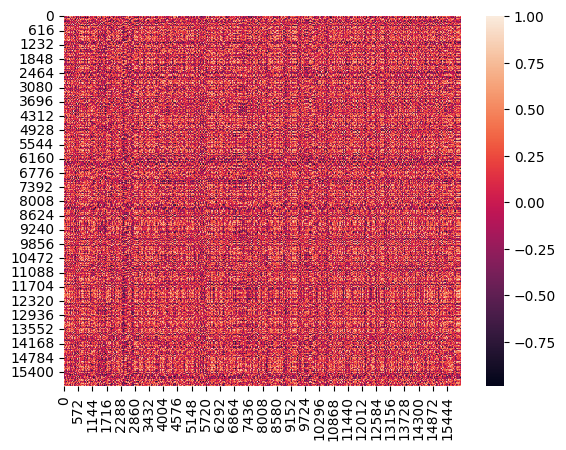

In [5]:
sns.heatmap(corr)
